In [2]:
import numpy as np # Basic python numeric library
import control as ctrl # Control systems library
import matplotlib.pyplot as plt # Python plots library
from scipy.constants import g # Gravity
%matplotlib inline

# Problem's Description


## Dynamic Equations

The inverted pendulum problem can be described by Figure

<img src="images/CartPole.png">

In order to use our formalism, we need to find the total kinectic and potential energy in the system. We identify the following quantities:
			
\begin{align}
	T_{1} &= \dfrac{1}{2}Mv_{1}^{2}\\
	T_{2} &= \dfrac{1}{2}mv_{2}^{2}\\
	V &= mg\ell cos(\theta)
\end{align}

Where $T_{1}$ stands for the kinetic energy of the cart, $T_{2}$, the kinetic energy of the pole, and $V$, the potential energy of the pole. The lagrangian, thus, takes the form:

\begin{align}
	L &= \dfrac{1}{2}Mv_{1}^{2} + \dfrac{1}{2}mv_{2}^{2} - mg\ell cos(\theta)
\end{align}

Now, we want to rewrite this equation in terms of state variables $(x,\theta)$. This can be done through:

\begin{align}
				v_{1}^{2} &= \dot{x}^{2}\\
				v_{2}^{2} &= (\dfrac{d}{dt} (x-\ell sin(\theta)))^{2} + (\dfrac{d}{dt}\ell cos(\theta))^{2}\\
						&= (\dot{x} - \ell\dot{\theta}cos(\theta))^{2} + (\ell\dot{\theta}sin(\theta))^{2}\\
						&= \dot{x} - 2\ell\dot{x}\dot{\theta}cos(\theta) + \ell^{2}\dot{\theta}^{2}cos(\theta)^{2} + \ell^{2}\dot{\theta}^{2}sin(\theta)^{2}\\
						&= \dot{x} - 2\ell\dot{x}\dot{\theta}cos(\theta) + \ell^{2}\dot{\theta}^{2}
			\end{align}
            
Thus, the Lagrangian takes the form:

We will apply the Euler Lagrange Equations to this later equation twice: one for $x,\dot{x}$, and another for $\theta,\dot{\theta}$:
			
\begin{align}
	\dfrac{\partial L}{\partial x} &= 0\\
	\dfrac{\partial L}{\partial \dot{x}} &= (M+m)\dot{x} - m\ell\dot{\theta}cos(\theta)\\
	\dfrac{\partial L}{\partial \theta} &= m\ell\dot{x}\dot{\theta}sin(\theta) + mg\ell sin(\theta)\\
	\dfrac{\partial L}{\partial \dot{\theta}} &= -m\ell\dot{x}cos(\theta) + m\ell^{2}\dot{\theta}
\end{align}

Then,

\begin{align}
				\dfrac{d}{dt}\dfrac{\partial L}{\partial \dot{x}} - \dfrac{\partial L}{\partial x} &= (M+m)\ddot{x} - m\ell\ddot{\theta}cos(\theta) + m\ell\dot{\theta}^{2}sin(\theta) \\
				\dfrac{d}{dt}\dfrac{\partial L}{\partial \dot{\theta}} - \dfrac{\partial L}{\partial \theta} &= -m\ell\ddot{x}cos(\theta) + m\ell\dot{x}\dot{\theta}sin(\theta) + m\ell^{2}\ddot{\theta} - m\ell\dot{x}\dot{\theta}sin(\theta) - mg\ell sin(\theta)
			\end{align}
            
Specially, we know that $\dfrac{d}{dt}\dfrac{\partial L}{\partial \dot{x}} - \dfrac{\partial L}{\partial x} = F - b\dot{x}$ and $\dfrac{d}{dt}\dfrac{\partial L}{\partial \dot{\theta}} - \dfrac{\partial L}{\partial \theta} = 0$, being $F$ the driving force in the cart, and $b$, the friction coefficient. After some simplifications, we arrive at the following equations:

\begin{align}
				(M+m)\ddot{x} + b\dot{x} - m\ell\ddot{\theta}cos(\theta) + m\ell\dot{\theta}^{2}sin(\theta) = F\\
				-m\ell\ddot{x}cos(\theta) + m\ell^{2}\ddot{\theta} - mg\ell sin(\theta) = 0
\end{align}

## Linearization and State Space

Since we want to stabilize these equations around $\pi$, consider values of $\theta$ around it, that is, $\theta = \pi + \delta\theta$. Then,
			
\begin{align}
				sin(\pi+\delta\theta) &= - \delta\theta\\
				cos(\pi+\delta\theta) &= -1\\
				(\delta\dot{\theta})^{2} &= 0
\end{align}
            
With those approximations, we arrive at:
			
\begin{align}
	(M+m)\ddot{x} + b\dot{x} + m\ell\delta\ddot{\theta} = F\\
	m\ell\ddot{x} + m\ell^{2}\delta\ddot{\theta} + mg\ell\delta\theta = 0
\end{align}
			
Solving for $\delta\ddot{\theta}$ and reapplying to find $\ddot{x}$,
			
\begin{align}
				(M+m)\ddot{x} + b\dot{x} - m\ell(\dfrac{1}{\ell}\ddot{x} + \dfrac{g}{\ell}\delta\theta) = F\\
				(M+m)\ddot{x} - m\ddot{x} = F - b\dot{x} + mg\delta\theta\\
				\ddot{x} = \dfrac{1}{M}F - \dfrac{b}{M}\dot{x} + \dfrac{mg}{M}\delta\theta
\end{align}
			
Reapplying $\ddot{x}$ and solving for $\delta\ddot{\theta}$,
			
\begin{align}
				m\ell(\dfrac{1}{M}F - \dfrac{b}{M}\dot{x} + \dfrac{mg}{M}\delta\theta) + m\ell^{2}\delta\ddot{\theta} + mg\ell\delta\theta = 0\\
				\dfrac{m\ell}{M}F - \dfrac{m\ell b}{M}\dot{x} + \dfrac{m^{2}\ell g}{M}\delta\theta + m\ell^{2}\delta\ddot{\theta} + mg\ell\delta\theta = 0\\
				\delta\ddot{\theta} = \dfrac{b}{M\ell}\dot{x} - \dfrac{(M+m)g}{M\ell}\delta\theta - \dfrac{1}{M\ell}F
\end{align}
 			
With those equations, we can write our state-space model as:
 			
\begin{align}
	 			\begin{bmatrix}
		 			\dot{x}\\
		 			\ddot{x}\\
		 			\dot{\theta}\\
		 			\ddot{\theta}
	 			\end{bmatrix} &= \begin{bmatrix}
		 			0 & 1 & 0 & 0\\
		 			0 & -\dfrac{b}{M} & \dfrac{mg}{M} & 0\\
		 			0 & 0 & 0 & 1\\
		 			0 & \dfrac{b}{M\ell} & - \dfrac{(M+m)g}{M\ell} & 0
	 			\end{bmatrix}\begin{bmatrix}
		 			x\\
		 			\dot{x}\\
		 			\theta\\
		 			\dot{\theta}
	 			\end{bmatrix}+\begin{bmatrix}
		 			0\\
		 			\dfrac{1}{M}\\
		 			0\\
		 			\dfrac{-1}{M\ell}
	 			\end{bmatrix}F\\
	 			\begin{bmatrix}
		 			x_{1}\\
		 			x_{3}
	 			\end{bmatrix} &= \begin{bmatrix}
		 			1 & 0 & 0 & 0\\
		 			0 & 1 & 0 & 0
	 			\end{bmatrix}\begin{bmatrix}
		 			x_{1}\\
		 			x_{2}\\
		 			x_{3}\\
		 			x_{4}
	 			\end{bmatrix} + \begin{bmatrix}
		 			0\\
		 			0
	 			\end{bmatrix}F
\end{align}

## Frequency Representation

We employ the Laplace Transform in order to represent our system in the frequency domain. Using the notation $u(t) = F(t)$, we have:

\begin{align}
		 		(M+m)s^{2}X(s) + bsX(s) + m\ell s^{2}\Theta(s) &= U(s)\\
		 		\dfrac{U(s)}{(M+m)s^{2} + bs} - \dfrac{m\ell s^{2}\Theta(s)}{(M+m)s^{2} + bs} & =X(s)\\
	 			m\ell s^{2}X(s) + m\ell^{2}s^{2}\Theta(s) + mg\ell \Theta(s) &= 0\\
	 			-\dfrac{\ell s^{2} + g}{ s^{2}}\Theta(s) &= X(s)
\end{align}

Those equations indeed imply the following relationship:
	 		
\begin{align}
		 		\dfrac{U(s)}{(M+m)s^{2} + bs} - \dfrac{m\ell s^{2}}{(M+m)s^{2} + bs}\Theta(s) &= -\dfrac{\ell s^{2} + g}{ s^{2}}\Theta(s)\\
		 		\dfrac{m\ell s^{4} - (M+m)\ell s^{2} - (M+m)g s^{2} - \ell b s^{3} + bg s }{((M+m)s^{2} + bs) s^{2}}\Theta(s) &= \dfrac{1}{(M+m)s^{2} + bs}U(s)
\end{align}

By considering $K = - (M+m)m\ell^{2}$, we can express our transfer function as:

\begin{align}
		 		\mathcal{H}(s) = \dfrac{\Theta(s)}{U(s)} = \dfrac{-\dfrac{s}{M\ell}}{s^{3} + \dfrac{b}{M} s^{2} + \dfrac{(M+m)g}{M\ell} s - \dfrac{bg}{M\ell}}
\end{align}

As a matter of effect, to control the system we shall introduce a controller, such that its function on the frequency domain is given by $\mathcal{C}(s)$. By applying feedback, we shall have the following transfer function:

\begin{align}
    T(s) = \dfrac{\Theta(s)}{F(s)} = \dfrac{\mathcal{H}}{1+\mathcal{H}\mathcal{C}}
\end{align}

## Simulation

In [3]:
"""
    System's constants
"""

M = 0.5
m = 0.2
b = 0.1
l = 0.3

In [4]:
"""
    Transfer Function
"""

Hnum = [-1/(M*l), 0]
Hden = [1, b/M, ((M+m)*g)/(M*l), -(b*g)/(M*l)]
H = ctrl.TransferFunction(Hnum,Hden)

In [5]:
"""
    PID controller
"""

Kp = 0
Kd = 0.1
Ki = 1

Cnum = [Kd, Kp, Ki]
Cden = [-1,0]
C = ctrl.TransferFunction(Cnum,Cden)

Text(0.5,0,'Time t [sec]')

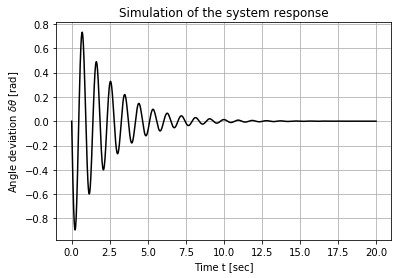

In [6]:
"""
    Simulation
"""

t = np.arange(0,20,0.01)
Transfer_Function = ctrl.feedback(H,C)
(T, Theta) = ctrl.impulse_response(Transfer_Function,T = t)

plt.figure()
plt.plot(T, Theta, 'k-')
plt.title('Simulation of the system response')
plt.ylabel(r'Angle deviation $\delta\theta$ [rad]')
plt.grid(True)
plt.xlabel('Time t [sec]')

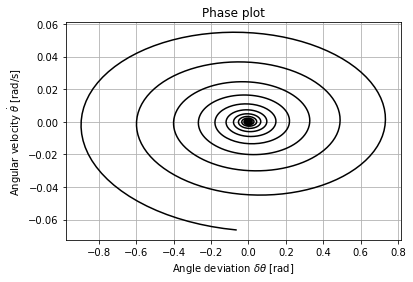

In [7]:
"""
    Derivative Evaluation
"""
dTheta = np.zeros((len(Theta),))
for i in range(len(Theta)-1):
    dTheta[i+1] = Theta[i+1] - Theta[i]

plt.figure()
plt.plot(Theta[1:],dTheta[1:], 'k-')
plt.title('Phase plot')
plt.ylabel(r'Angular velocity $\dot{\theta}$ [rad/s]')
plt.xlabel(r'Angle deviation $\delta\theta$ [rad]')
plt.grid(True)